## Load data and plot cases

In [1]:
import pandas as pd

In [2]:
# src: https://npgeo-corona-npgeo-de.hub.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0
df = pd.read_csv("data/RKI.csv")

In [3]:
df.tail()

,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,ObjectId,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
1102950,16,Thüringen,LK Altenburger Land,A80+,W,2,0,1102951,2021/01/20 00:00:00+00,16077,"26.01.2021, 00:00 Uhr",0,-9,2021/01/20 00:00:00+00,-9,0,0,Nicht übermittelt
1102951,16,Thüringen,LK Altenburger Land,A80+,W,4,0,1102952,2021/01/21 00:00:00+00,16077,"26.01.2021, 00:00 Uhr",0,-9,2021/01/21 00:00:00+00,-9,0,0,Nicht übermittelt
1102952,16,Thüringen,LK Altenburger Land,A80+,W,5,0,1102953,2021/01/22 00:00:00+00,16077,"26.01.2021, 00:00 Uhr",0,-9,2021/01/22 00:00:00+00,-9,0,0,Nicht übermittelt
1102953,16,Thüringen,LK Altenburger Land,A80+,W,6,0,1102954,2021/01/23 00:00:00+00,16077,"26.01.2021, 00:00 Uhr",0,-9,2021/01/23 00:00:00+00,-9,0,0,Nicht übermittelt
1102954,16,Thüringen,LK Altenburger Land,A80+,W,3,0,1102955,2021/01/24 00:00:00+00,16077,"26.01.2021, 00:00 Uhr",0,-9,2021/01/24 00:00:00+00,-9,0,0,Nicht übermittelt


In [4]:
df.dtypes

IdBundesland             int64
Bundesland              object
Landkreis               object
Altersgruppe            object
Geschlecht              object
AnzahlFall               int64
AnzahlTodesfall          int64
ObjectId                 int64
Meldedatum              object
IdLandkreis              int64
Datenstand              object
NeuerFall                int64
NeuerTodesfall           int64
Refdatum                object
NeuGenesen               int64
AnzahlGenesen            int64
IstErkrankungsbeginn     int64
Altersgruppe2           object
dtype: object

In [5]:
df["Meldedatum"] = df["Meldedatum"].str.extract(r'^(\d\d\d\d\/\d\d\/\d\d).*$')
df["Refdatum"] = df["Refdatum"].str.extract(r'^(\d\d\d\d\/\d\d\/\d\d).*$')

In [6]:
df.tail()

,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,ObjectId,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
1102950,16,Thüringen,LK Altenburger Land,A80+,W,2,0,1102951,2021/01/20,16077,"26.01.2021, 00:00 Uhr",0,-9,2021/01/20,-9,0,0,Nicht übermittelt
1102951,16,Thüringen,LK Altenburger Land,A80+,W,4,0,1102952,2021/01/21,16077,"26.01.2021, 00:00 Uhr",0,-9,2021/01/21,-9,0,0,Nicht übermittelt
1102952,16,Thüringen,LK Altenburger Land,A80+,W,5,0,1102953,2021/01/22,16077,"26.01.2021, 00:00 Uhr",0,-9,2021/01/22,-9,0,0,Nicht übermittelt
1102953,16,Thüringen,LK Altenburger Land,A80+,W,6,0,1102954,2021/01/23,16077,"26.01.2021, 00:00 Uhr",0,-9,2021/01/23,-9,0,0,Nicht übermittelt
1102954,16,Thüringen,LK Altenburger Land,A80+,W,3,0,1102955,2021/01/24,16077,"26.01.2021, 00:00 Uhr",0,-9,2021/01/24,-9,0,0,Nicht übermittelt


In [7]:
df["Meldedatum"] = pd.to_datetime(df["Meldedatum"])
df["Refdatum"] = pd.to_datetime(df["Refdatum"])

In [8]:
df.dtypes

IdBundesland                     int64
Bundesland                      object
Landkreis                       object
Altersgruppe                    object
Geschlecht                      object
AnzahlFall                       int64
AnzahlTodesfall                  int64
ObjectId                         int64
Meldedatum              datetime64[ns]
IdLandkreis                      int64
Datenstand                      object
NeuerFall                        int64
NeuerTodesfall                   int64
Refdatum                datetime64[ns]
NeuGenesen                       int64
AnzahlGenesen                    int64
IstErkrankungsbeginn             int64
Altersgruppe2                   object
dtype: object

In [9]:
df.set_index("Meldedatum", inplace=True)
df.index

DatetimeIndex(['2020-09-30', '2020-10-29', '2020-11-03', '2020-11-20',
               '2020-11-23', '2020-12-18', '2021-01-06', '2021-01-08',
               '2021-01-09', '2021-01-16',
               ...
               '2021-01-16', '2021-01-16', '2021-01-17', '2021-01-18',
               '2021-01-19', '2021-01-20', '2021-01-21', '2021-01-22',
               '2021-01-23', '2021-01-24'],
              dtype='datetime64[ns]', name='Meldedatum', length=1102955, freq=None)

<AxesSubplot:xlabel='Meldedatum'>

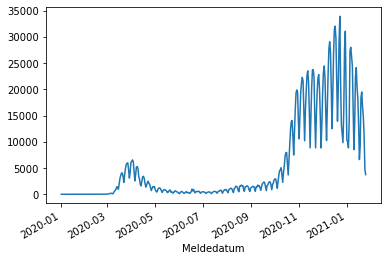

In [10]:
df.groupby(["Meldedatum"]).AnzahlFall.sum().plot()

## Preprocessing the Dataset for Time Series Analysis
src: 
https://towardsdatascience.com/3-steps-to-forecast-time-series-lstm-with-tensorflow-keras-ba88c6f05237 , 
https://towardsdatascience.com/3-steps-to-forecast-time-series-lstm-with-tensorflow-keras-ba88c6f05237

In [11]:
df = df.groupby(["Meldedatum"]).AnzahlFall.sum().reset_index()
df

,Meldedatum,AnzahlFall
0,2020-01-02,6
1,2020-01-03,6
2,2020-01-04,3
3,2020-01-05,1
4,2020-01-06,1
...,...,...
371,2021-01-21,16695
372,2021-01-22,14808
373,2021-01-23,11381
374,2021-01-24,4798


In [12]:
import math
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import Sequence
from datetime import timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import time
import numpy as np

In [13]:
# df = df.reset_index()

In [14]:
# remove last 7 days - they are anyway unreliable
df = df[df["Meldedatum"] < df['Meldedatum'].max() - timedelta(days=7)]

In [15]:
test_cutoff_date = df['Meldedatum'].max() - timedelta(days=28)
test_cutoff_date

Timestamp('2020-12-20 00:00:00')

In [16]:
val_cutoff_date = test_cutoff_date - timedelta(days=28)
val_cutoff_date

Timestamp('2020-11-22 00:00:00')

In [17]:
df_test = df[df['Meldedatum'] > test_cutoff_date]
df_val = df[(df['Meldedatum'] > val_cutoff_date) & (df['Meldedatum'] <= test_cutoff_date)]
df_train = df[df['Meldedatum'] <= val_cutoff_date]

#check out the datasets
print('Test dates: {} to {}'.format(df_test['Meldedatum'].min(), df_test['Meldedatum'].max()))
print('Validation dates: {} to {}'.format(df_val['Meldedatum'].min(), df_val['Meldedatum'].max()))
print('Train dates: {} to {}'.format(df_train['Meldedatum'].min(), df_train['Meldedatum'].max()))


Test dates: 2020-12-21 00:00:00 to 2021-01-17 00:00:00
Validation dates: 2020-11-23 00:00:00 to 2020-12-20 00:00:00
Train dates: 2020-01-02 00:00:00 to 2020-11-22 00:00:00


## Transforming the Dataset for TensorFlow Keras

In [18]:
complete = df['AnzahlFall'].values
train = df_train['AnzahlFall'].values
test = df_test['AnzahlFall'].values
val = df_val['AnzahlFall'].values


# Scaled to work with Neural networks.
scaler = MinMaxScaler(feature_range=(0, 1))
complete_scaled = scaler.fit_transform(complete.reshape(-1, 1)).reshape(-1, )
train_scaled = scaler.transform(train.reshape(-1, 1)).reshape(-1, )
test_scaled = scaler.transform(test.reshape(-1, 1)).reshape(-1, )
val_scaled = scaler.transform(val.reshape(-1, 1)).reshape(-1, )

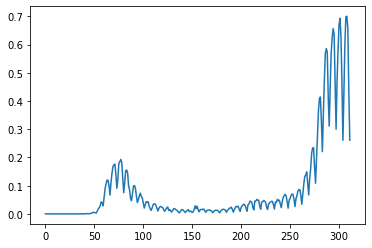

In [19]:
import matplotlib.pyplot as plt
plt.plot(train_scaled)
plt.show()

In [163]:
from tensorflow import keras
from tensorflow.keras import layers, Sequential

input_days = 30
output_days = 7
# Create the Keras model.
# Use hyperparameter optimization if you have the time.

#ts_inputs = tf.keras.Input(shape=(num_timesteps, 1))
# units=10 -> The cell and hidden states will be of dimension 10.
#             The number of parameters that need to be trained = 4*units*(units+2)
#x = layers.LSTM(units=10)(ts_inputs)
#x = layers.Dropout(0.2)(x)
#outputs = layers.Dense(1, activation='linear')(x)
#model = tf.keras.Model(inputs=ts_inputs, outputs=outputs)





#model = keras.Sequential()
#model.add(layers.LSTM(
#    input_shape=(input_days, 1),
#    return_sequences=True, units=1))
#model.add(layers.Dropout(0.2))
#model.add(layers.LSTM(
#    250,
#    return_sequences=True))
#model.add(layers.Dropout(0.2))
#model.add(layers.TimeDistributed(layers.Dense(1)))
#model.add(layers.Activation("linear"))
#model.compile(loss="mse", optimizer="rmsprop")

# define model
model = Sequential()
model.add(layers.LSTM(100, activation='relu', return_sequences=True, input_shape=(input_days, 1)))
model.add(layers.LSTM(100, activation='relu'))
model.add(layers.Dense(output_days))
model.compile(optimizer='adam', loss='mse')

In [164]:
# Specify the training configuration.
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mse'])

In [165]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 30, 100)           40800     
_________________________________________________________________
lstm_11 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 707       
Total params: 121,907
Trainable params: 121,907
Non-trainable params: 0
_________________________________________________________________


In [166]:
# sample batch
batch_X = []
batch_Y = []
for y in range(0,1):
    batch_X.append(np.expand_dims(train_scaled[i:i+14], axis=1))
    batch_Y.append(train_scaled[i+14:i+(2*14)])
    i+=14
batch_X = np.array(batch_X)
batch_Y = np.array(batch_Y)

In [167]:
batch_X

array([], shape=(1, 0, 1), dtype=float64)

In [168]:
batch_Y

array([], shape=(1, 0), dtype=float64)

In [169]:
# Training
dataset = train_scaled
start = 0
end = len(dataset)
batch_size = 1
num_epochs = 100

for e in range(0,num_epochs):
    i = 0
    # train epochs in batches:
    while i+((input_days+output_days)*batch_size)<=end:
        batch_X = []
        batch_Y = []
        for y in range(0,batch_size):
            batch_X.append(np.expand_dims(dataset[i:i+input_days], axis=1))
            batch_Y.append(dataset[i+output_days:i+(2*output_days)])
            i+=input_days
        batch_X = np.array(batch_X)
        batch_Y = np.array(batch_Y)
        model.fit(x=batch_X, y=batch_Y, batch_size=16)

1/1 [==============================] - 0s 83ms/sample - loss: 3.1640e-04 - mean_squared_error: 3.1640e-04


1/1 [==============================] - 0s 68ms/sample - loss: 0.0842 - mean_squared_error: 0.0842


1/1 [==============================] - 0s 71ms/sample - loss: 0.0780 - mean_squared_error: 0.0780


1/1 [==============================] - 0s 72ms/sample - loss: 0.0735 - mean_squared_error: 0.0735


1/1 [==============================] - 0s 72ms/sample - loss: 0.0025 - mean_squared_error: 0.0025


1/1 [==============================] - 0s 74ms/sample - loss: 5.3090e-04 - mean_squared_error: 5.3090e-04


1/1 [==============================] - 0s 74ms/sample - loss: 0.0016 - mean_squared_error: 0.0016


1/1 [==============================] - 0s 72ms/sample - loss: 6.1478e-04 - mean_squared_error: 6.1478e-04


1/1 [==============================] - 0s 71ms/sample - loss: 0.0627 - mean_squared_error: 0.0627


1/1 [==============================] - 0s 71ms/sample - loss: 0.0034 - mean_squared_error: 0.0034


1/1 [==============================] - 0s 73ms/sample - loss: 7.1670e-04 - mean_squared_error: 7.1670e-04


1/1 [==============================] - 0s 134ms/sample - loss: 0.0020 - mean_squared_error: 0.0020


1/1 [==============================] - 0s 88ms/sample - loss: 0.0599 - mean_squared_error: 0.0599


In [170]:
X = np.expand_dims(np.expand_dims(complete_scaled[0:14], axis=1),axis=0)
np.squeeze(model.predict(X)[0])

ValueError: Error when checking input: expected lstm_10_input to have shape (30, 1) but got array with shape (14, 1)

In [171]:
start = 0
end = len(complete_scaled)
predictions = []

i = 0
# predict one epoch:
while i+(input_days+output_days)<=end:
    X = np.expand_dims(np.expand_dims(complete_scaled[i:i+input_days], axis=1),axis=0)
    i+=output_days
    predictions.extend(np.squeeze(model.predict(X)[0]))

In [172]:
len(predictions)

336

In [173]:
len(complete_scaled)-7

361

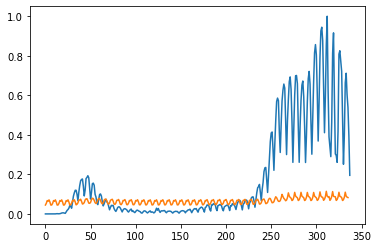

In [174]:
plt.plot(complete_scaled[input_days:],label="truth") # first seven days (0-6) were used as input for prediction
plt.plot(predictions[0:],label="predicted")
plt.show()

In [175]:
# Let's test model with last 28 days (= test set)
dataset = test_scaled
start = 0
end = len(dataset)
input_days = 14

i = 0
while i+(input_days*batch_size)<=end:
    batch_X = []
    batch_Y = []
    for y in range(0,batch_size):
        batch_X.append(np.expand_dims(dataset[i:i+7], axis=1))
        batch_Y.append(dataset[i+7])
        i+=1
batch_X = np.array(batch_X)
batch_Y = np.array(batch_Y)
    
results = model.evaluate(batch_X, batch_Y, batch_size=batch_size)

ValueError: Error when checking input: expected lstm_10_input to have shape (30, 1) but got array with shape (7, 1)

In [63]:
dataset = test_scaled
start = 0
end = len(dataset)
predictions = []
input_days = 14

i = 0
# predict one epoch:
while i+input_days<=end:
    X = np.expand_dims(np.expand_dims(dataset[i:i+14], axis=1),axis=0)
    i+=input_days
    predictions.extend(np.squeeze(model.predict(X)[0]))

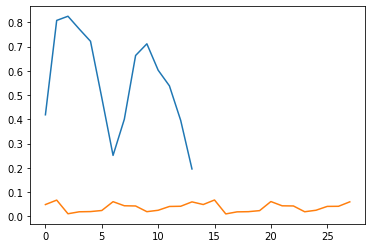

In [64]:
plt.plot(test_scaled[14:],label="truth") # first seven days (0-6) were used as input for prediction
plt.plot(predictions,label="predicted")
plt.show()